# BTC 以外にも 1万以上 のコインデータが取得できます。


=== Fetching BTC (bitcoin) ===


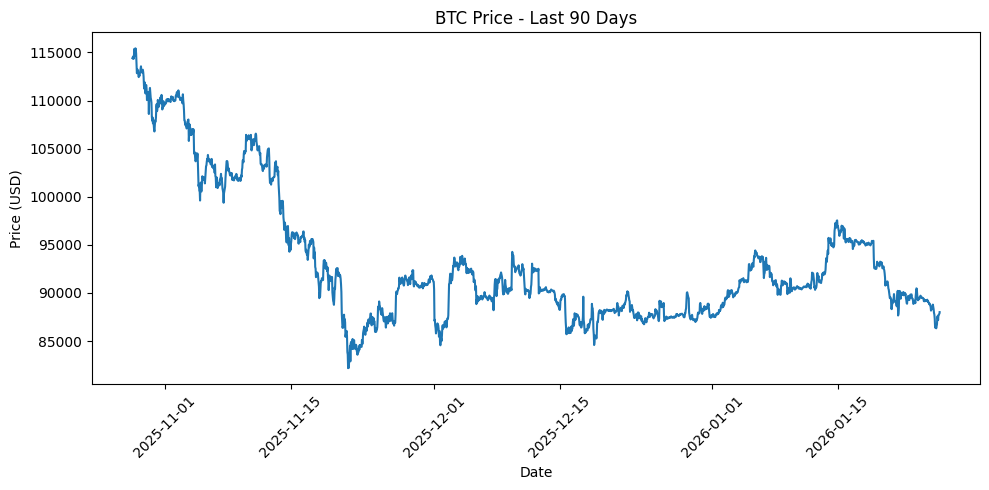

Waiting 5 seconds to avoid rate limit...

=== Fetching ETH (ethereum) ===


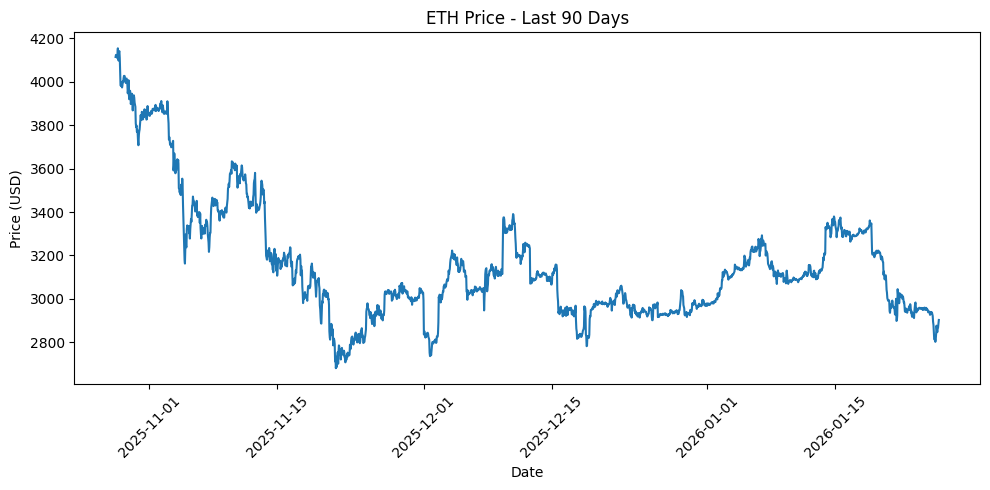

Waiting 5 seconds to avoid rate limit...

=== Fetching USDT (tether) ===


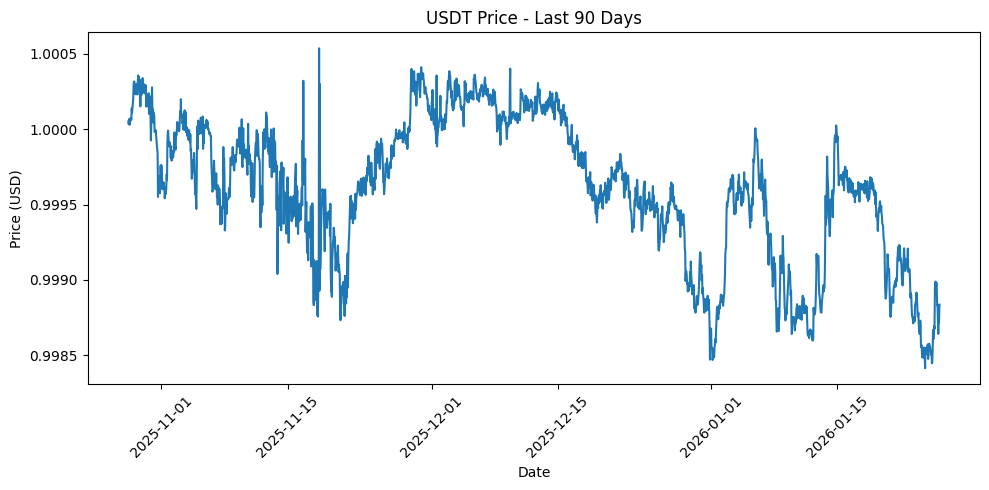

Waiting 5 seconds to avoid rate limit...

=== Fetching BNB (binancecoin) ===


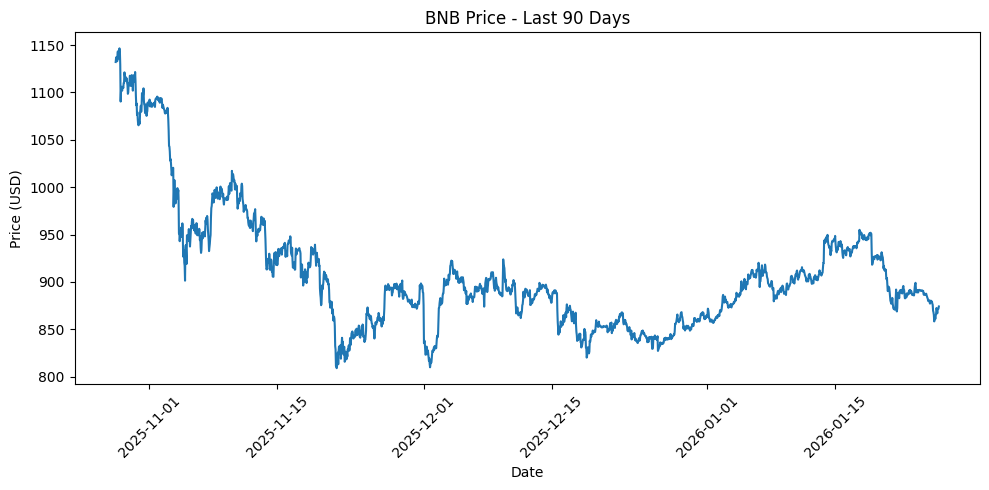

Waiting 5 seconds to avoid rate limit...

=== Fetching SOL (solana) ===


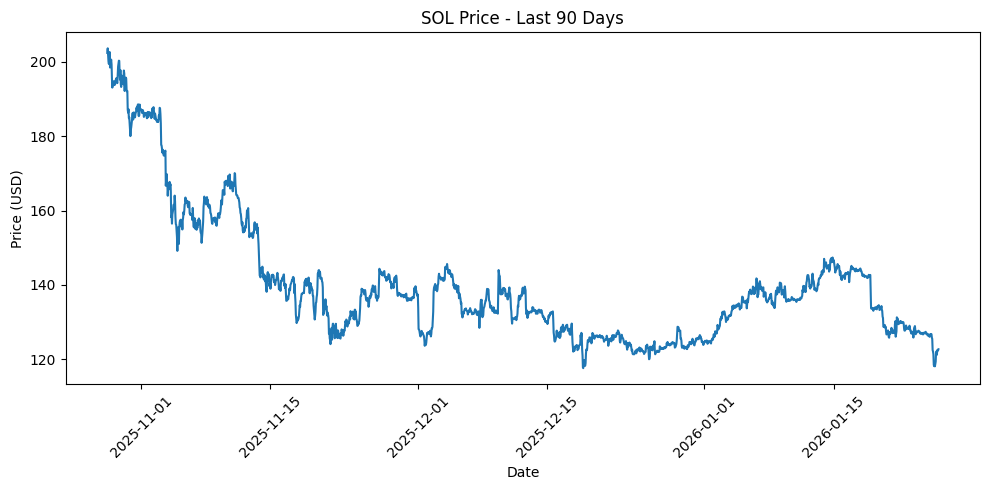

Waiting 5 seconds to avoid rate limit...

=== Fetching XRP (ripple) ===
[429] Too Many Requests. Waiting 5 sec... (attempt 1/3)
[429] Too Many Requests. Waiting 5 sec... (attempt 2/3)
[429] Too Many Requests. Waiting 5 sec... (attempt 3/3)


RuntimeError: Failed after retries: ripple

In [ ]:
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt

COINS = [
    ("bitcoin", "BTC"),
    ("ethereum", "ETH"),
    ("tether", "USDT"),
    ("binancecoin", "BNB"),
    ("solana", "SOL"),
    ("ripple", "XRP"),
    ("usd-coin", "USDC"),
    ("cardano", "ADA"),
    ("dogecoin", "DOGE"),
    ("avalanche-2", "AVAX"),
]

VS = "usd"
DAYS = 90
BASE = "https://api.coingecko.com/api/v3/coins/{id}/market_chart"

session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0 (compatible; stable-demo/1.0)"
})

def fetch_market_chart(coin_id, days=90, vs="usd"):
    url = BASE.format(id=coin_id)
    params = {"vs_currency": vs, "days": days}

    for attempt in range(3):
        r = session.get(url, params=params, timeout=30)
        if r.status_code == 200:
            data = r.json()
            df = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
            return df

        if r.status_code == 429:
            print(f"[429] Too Many Requests. Waiting 5 sec... (attempt {attempt+1}/3)")
            time.sleep(5)
            continue

        r.raise_for_status()

    raise RuntimeError(f"Failed after retries: {coin_id}")

for coin_id, symbol in COINS:
    print(f"\n=== Fetching {symbol} ({coin_id}) ===")

    df = fetch_market_chart(coin_id, DAYS, VS)

    plt.figure(figsize=(10, 5))
    plt.plot(df["timestamp"], df["price"])
    plt.xlabel("Date")
    plt.ylabel(f"Price ({VS.upper()})")
    plt.title(f"{symbol} Price - Last {DAYS} Days")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # ★ 次の銘柄へ進む前に5秒待つ（非常に安定）
    print("Waiting 5 seconds to avoid rate limit...")
    time.sleep(30)
